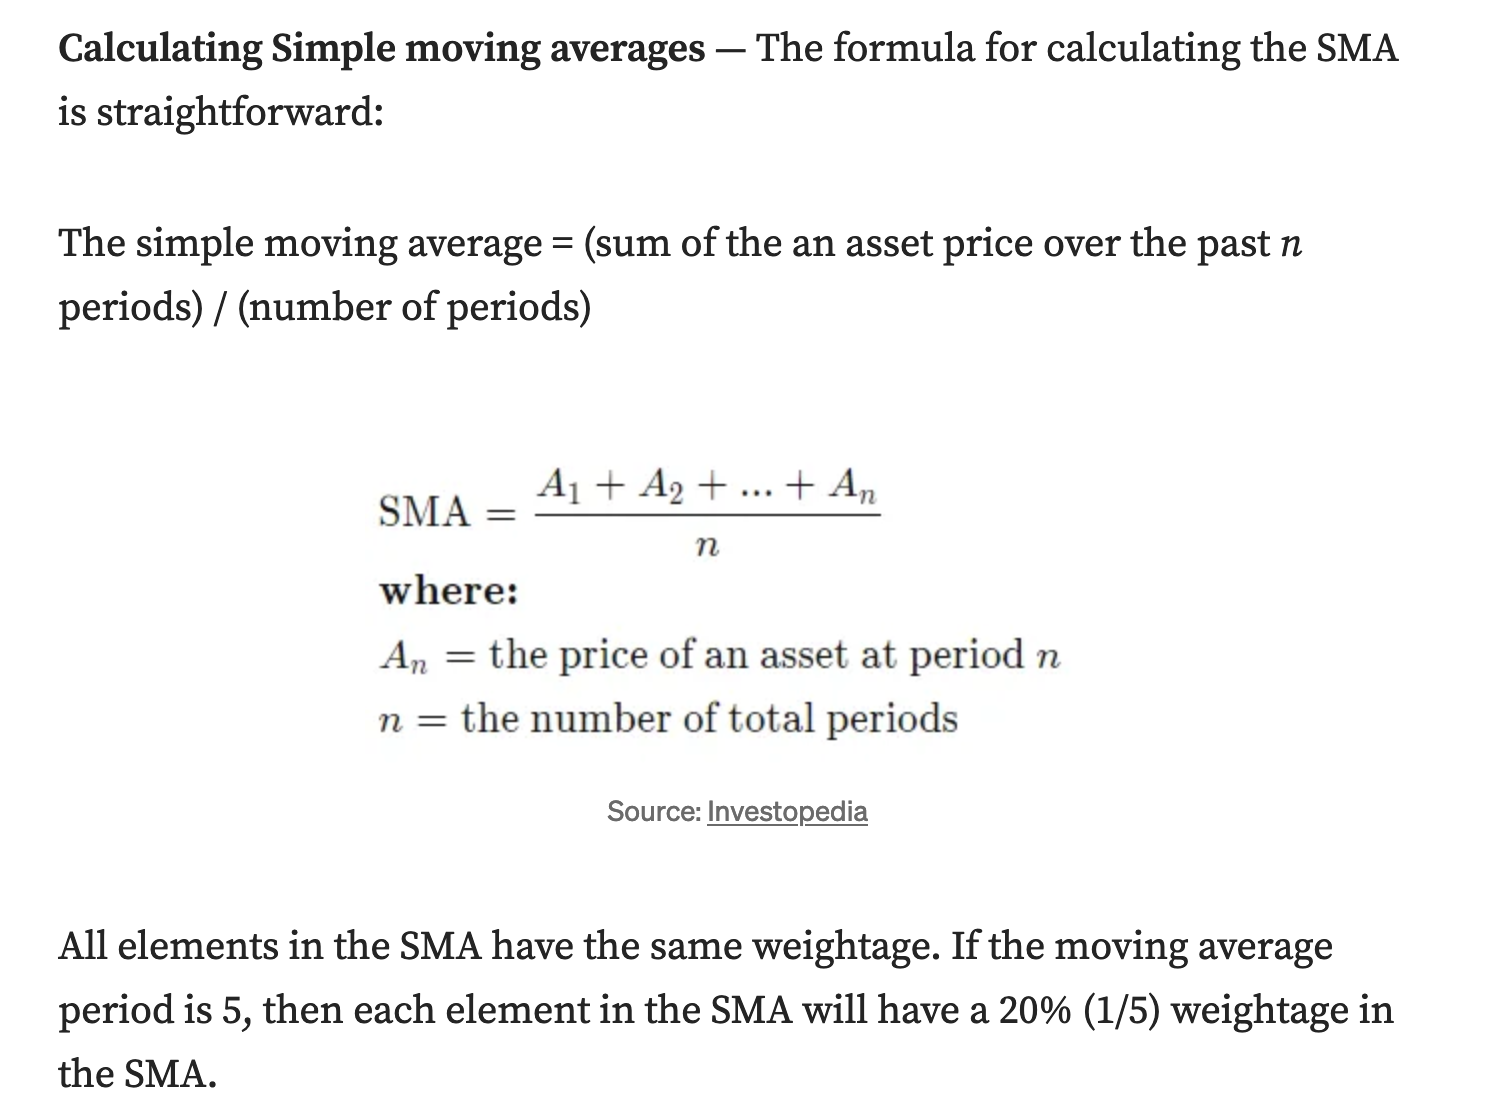

In [56]:
from IPython.display import Image
Image(filename = '/Users/mburley/Downloads/SMA.png', width = 500, height = 200)

In [57]:
### Library Imports

import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf 
import matplotlib.dates as mdates

In [58]:
### Load in Stock Data

tickers = 'GOOG'
start_date = '2019-02-01'

def import_stock_data(tickers, start_date):
    data = pd.DataFrame()
    if len([tickers]) == 1:
        data[tickers] = yf.download(tickers, start_date)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = yf.download(tickers, start_date)['Adj Close']
    # Reset index to make headings in the same row
    data.reset_index(inplace = True)

    data['Date'] = pd.to_datetime(data['Date'])

    return data

stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Date,GOOG
0,2019-02-01,55.537498
1,2019-02-04,56.639999
2,2019-02-05,57.299500
3,2019-02-06,55.761501
4,2019-02-07,54.935501
...,...,...
1265,2024-02-12,148.729996
1266,2024-02-13,146.369995
1267,2024-02-14,147.139999
1268,2024-02-15,143.940002


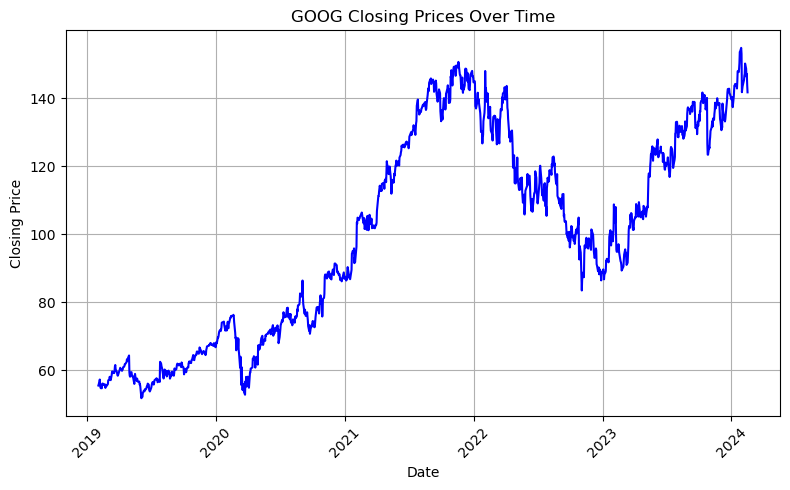

In [59]:
### Plot Stock Data

# Assuming df is your DataFrame returned from import_stock_data
plt.figure(figsize=(8, 5))

plt.plot(stock_data['Date'], stock_data[tickers], color = 'blue') # Need to adjust to spit out multiple graphs for each ticker

plt.title('GOOG Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()



In [60]:
### Function to Create SMA columns

num_days = [5, 10, 20, 50, 100]

def get_SMA(df, num_days):
    # Loop over window length to get SMA cols
    for d in num_days:
        df[f'{d}_SMA'] = df['GOOG'].rolling(window = d, min_periods = 1).mean()
    
    return df

stock_data_SMA = get_SMA(stock_data, num_days)
stock_data_SMA

,Date,GOOG,5_SMA,10_SMA,20_SMA,50_SMA,100_SMA
0,2019-02-01,55.537498,55.537498,55.537498,55.537498,55.537498,55.537498
1,2019-02-04,56.639999,56.088749,56.088749,56.088749,56.088749,56.088749
2,2019-02-05,57.299500,56.492332,56.492332,56.492332,56.492332,56.492332
3,2019-02-06,55.761501,56.309625,56.309625,56.309625,56.309625,56.309625
4,2019-02-07,54.935501,56.034800,56.034800,56.034800,56.034800,56.034800
...,...,...,...,...,...,...,...
1265,2024-02-12,148.729996,147.651999,146.428999,147.661500,141.909000,138.268200
1266,2024-02-13,146.369995,147.843997,145.760999,147.775999,142.158000,138.386000
1267,2024-02-14,147.139999,147.935999,146.294998,147.988499,142.434400,138.543800
1268,2024-02-15,143.940002,147.279999,146.417998,147.935999,142.700600,138.670700


In [62]:
### Create Signal Column

# create a new column ‘Signal’ such that if 20-day SMA is greater than 50-day SMA then set Signal value as 1 
# else when 50-day SMA is greater than 20-day SMA then set it’s value as 0
stock_data_SMA['Signal'] = 0.0
stock_data_SMA['Signal'] = np.where(stock_data_SMA['20_SMA'] > stock_data_SMA['50_SMA'], 1.0, 0.0)

stock_data_SMA

,Date,GOOG,5_SMA,10_SMA,20_SMA,50_SMA,100_SMA,Signal
0,2019-02-01,55.537498,55.537498,55.537498,55.537498,55.537498,55.537498,0.0
1,2019-02-04,56.639999,56.088749,56.088749,56.088749,56.088749,56.088749,0.0
2,2019-02-05,57.299500,56.492332,56.492332,56.492332,56.492332,56.492332,0.0
3,2019-02-06,55.761501,56.309625,56.309625,56.309625,56.309625,56.309625,0.0
4,2019-02-07,54.935501,56.034800,56.034800,56.034800,56.034800,56.034800,0.0
...,...,...,...,...,...,...,...,...
1265,2024-02-12,148.729996,147.651999,146.428999,147.661500,141.909000,138.268200,1.0
1266,2024-02-13,146.369995,147.843997,145.760999,147.775999,142.158000,138.386000,1.0
1267,2024-02-14,147.139999,147.935999,146.294998,147.988499,142.434400,138.543800,1.0
1268,2024-02-15,143.940002,147.279999,146.417998,147.935999,142.700600,138.670700,1.0


In [64]:
### Create Position column

# From these ‘Signal’ values, the position orders can be generated to represent trading signals. Crossover happens when the 
# faster moving average and the slower moving average cross, or in other words the ‘Signal’ changes from 0 to 1 (or 1 to 0)
stock_data_SMA['Position'] = stock_data_SMA['Signal'].diff()# display first few rows
stock_data_SMA.head()

,Date,GOOG,5_SMA,10_SMA,20_SMA,50_SMA,100_SMA,Signal,Position
0,2019-02-01,55.537498,55.537498,55.537498,55.537498,55.537498,55.537498,0.0,NaN
1,2019-02-04,56.639999,56.088749,56.088749,56.088749,56.088749,56.088749,0.0,0.0
2,2019-02-05,57.299500,56.492332,56.492332,56.492332,56.492332,56.492332,0.0,0.0
3,2019-02-06,55.761501,56.309625,56.309625,56.309625,56.309625,56.309625,0.0,0.0
4,2019-02-07,54.935501,56.034800,56.034800,56.034800,56.034800,56.034800,0.0,0.0


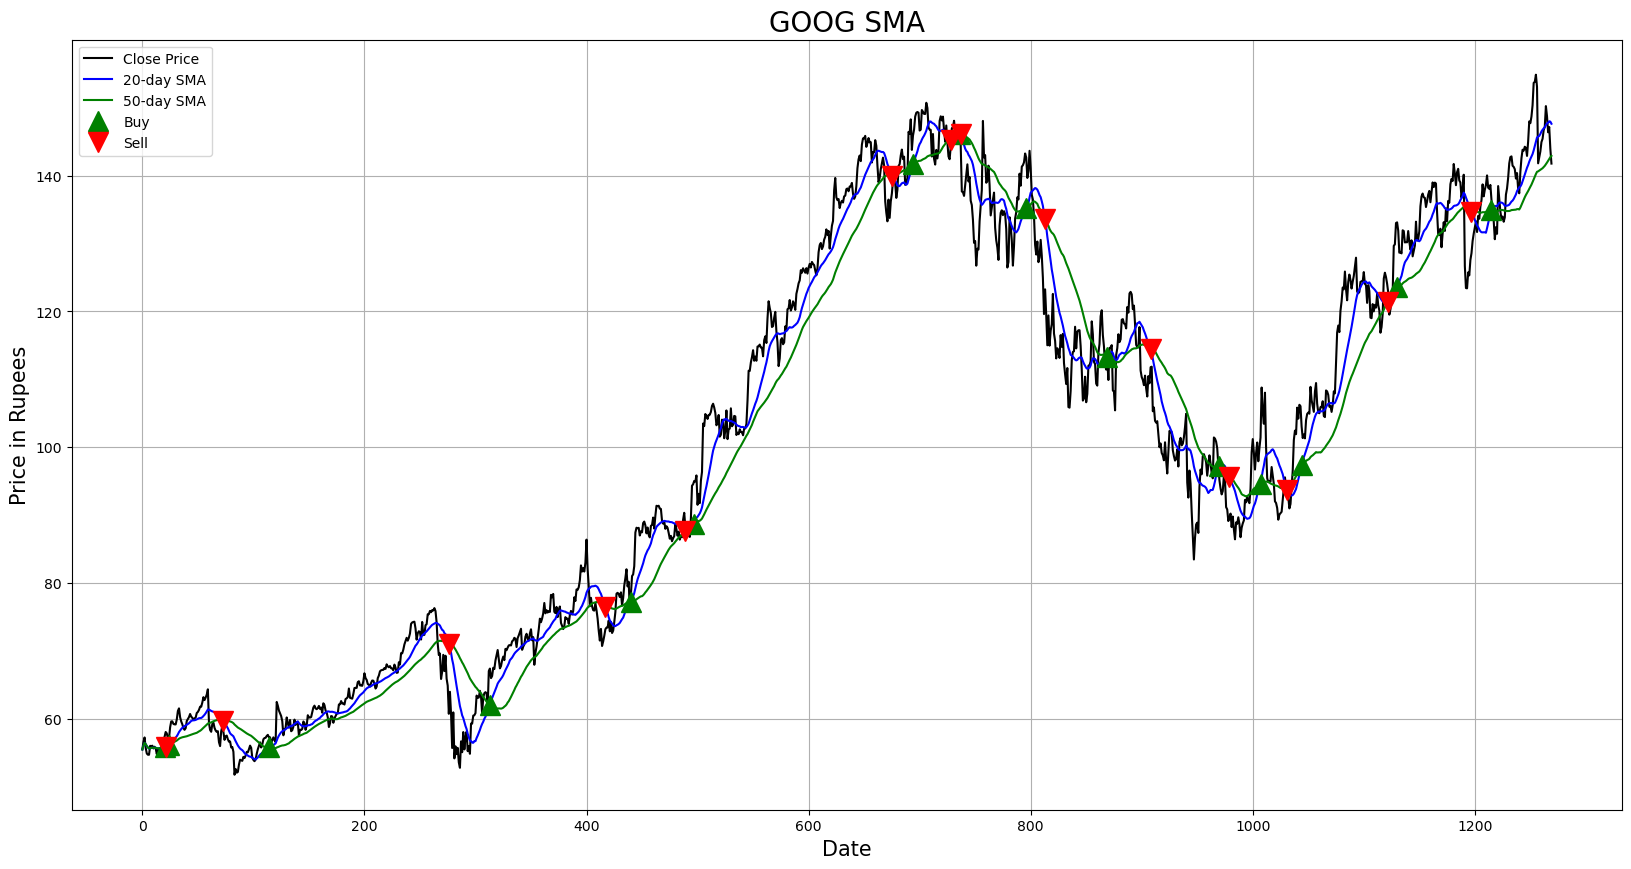

In [67]:
### Plot the Buy and Sell Signals

plt.figure(figsize=(20, 10))

# Plot close price, short-term, and long-term moving averages
stock_data_SMA['GOOG'].plot(color = 'k', label = 'Close Price')
stock_data_SMA['20_SMA'].plot(color = 'b', label = '20-day SMA')
stock_data_SMA['50_SMA'].plot(color = 'g', label = '50-day SMA')

# Plot 'buy' signals
plt.plot(stock_data_SMA[stock_data_SMA['Position'] == 1].index, 
         stock_data_SMA['20_SMA'][stock_data_SMA['Position'] == 1], 
         '^', markersize=15, color='g', label='Buy')

# Plot 'sell' signals
plt.plot(stock_data_SMA[stock_data_SMA['Position'] == -1].index, 
         stock_data_SMA['20_SMA'][stock_data_SMA['Position'] == -1], 
         'v', markersize=15, color='r', label='Sell')

# Set labels and title
plt.ylabel('Price in Rupees', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.title('GOOG SMA', fontsize = 20)

# Add legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()
